In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [8]:
datei_pfad = "temp_data/GlobalLandTemperaturesByMajorCity.csv"
data = pd.read_csv(datei_pfad)

data.head(10)


,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1849-01-01,26.704,1.435,Abidjan,Côte D'Ivoire,5.63N,3.23W
1,1849-02-01,27.434,1.362,Abidjan,Côte D'Ivoire,5.63N,3.23W
2,1849-03-01,28.101,1.612,Abidjan,Côte D'Ivoire,5.63N,3.23W
3,1849-04-01,26.140,1.387,Abidjan,Côte D'Ivoire,5.63N,3.23W
4,1849-05-01,25.427,1.200,Abidjan,Côte D'Ivoire,5.63N,3.23W
5,1849-06-01,24.844,1.402,Abidjan,Côte D'Ivoire,5.63N,3.23W
6,1849-07-01,24.058,1.254,Abidjan,Côte D'Ivoire,5.63N,3.23W
7,1849-08-01,23.576,1.265,Abidjan,Côte D'Ivoire,5.63N,3.23W
8,1849-09-01,23.662,1.226,Abidjan,Côte D'Ivoire,5.63N,3.23W
9,1849-10-01,25.263,1.175,Abidjan,Côte D'Ivoire,5.63N,3.23W


In [10]:
# Alle eindeutigen Städte ausgeben
"""einzigartige_staedte = data['City'].unique()
print(f"Anzahl verschiedener Städte: {len(einzigartige_staedte)}")
print(einzigartige_staedte)"""

# Alphabetisch sortiert
einzigartige_staedte = sorted(data['City'].unique())
for stadt in einzigartige_staedte:
    print(stadt)



Abidjan
Addis Abeba
Ahmadabad
Aleppo
Alexandria
Ankara
Baghdad
Bangalore
Bangkok
Belo Horizonte
Berlin
Bogotá
Bombay
Brasília
Cairo
Calcutta
Cali
Cape Town
Casablanca
Changchun
Chengdu
Chicago
Chongqing
Dakar
Dalian
Dar Es Salaam
Delhi
Dhaka
Durban
Faisalabad
Fortaleza
Gizeh
Guangzhou
Harare
Harbin
Ho Chi Minh City
Hyderabad
Ibadan
Istanbul
Izmir
Jaipur
Jakarta
Jiddah
Jinan
Kabul
Kano
Kanpur
Karachi
Kiev
Kinshasa
Lagos
Lahore
Lakhnau
Lima
London
Los Angeles
Luanda
Madras
Madrid
Manila
Mashhad
Melbourne
Mexico
Mogadishu
Montreal
Moscow
Nagoya
Nagpur
Nairobi
Nanjing
New Delhi
New York
Paris
Peking
Pune
Rangoon
Rio De Janeiro
Riyadh
Rome
Saint Petersburg
Salvador
Santiago
Santo Domingo
Seoul
Shanghai
Shenyang
Singapore
Surabaya
Surat
Sydney
São Paulo
Taipei
Taiyuan
Tangshan
Tianjin
Tokyo
Toronto
Umm Durman
Wuhan
Xian


Temperaturverlauf für die Stadt Madrid über die Zeit als Liniendiagramm darstellt:

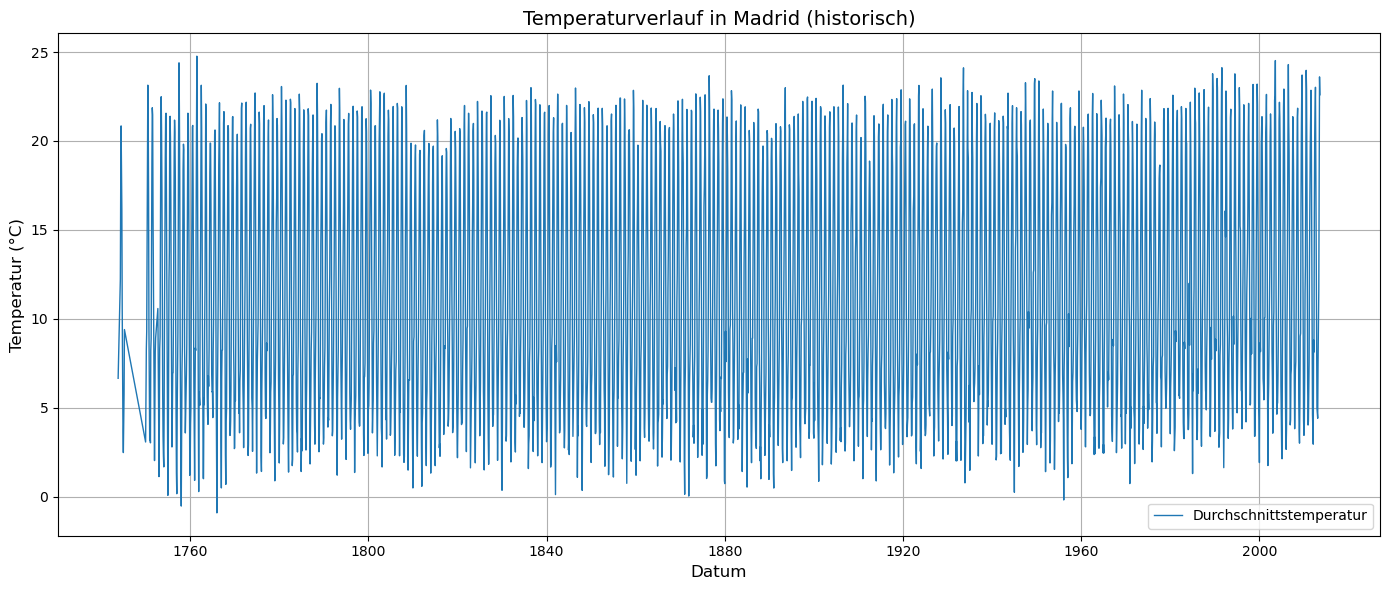

In [11]:
# Datentyp der Zeitspalte konvertieren
data['dt'] = pd.to_datetime(data['dt'])

# Daten für Madrid filtern
madrid_data = data[data['City'] == 'Madrid'].sort_values('dt')

# Nur die Zeilen mit gültiger Temperatur anzeigen
madrid_data = madrid_data[madrid_data['AverageTemperature'].notnull()]

# Plot erstellen
plt.figure(figsize=(14, 6))
plt.plot(madrid_data['dt'], madrid_data['AverageTemperature'], label='Durchschnittstemperatur', linewidth=1)

plt.title('Temperaturverlauf in Madrid (historisch)', fontsize=14)
plt.xlabel('Datum', fontsize=12)
plt.ylabel('Temperatur (°C)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()


Nur die Sommermonate (Juni, Juli, August),

Alle 5 Jahre,

Den Durchschnitt der Temperaturen für diese Sommermonate je 5-Jahres-Intervall in Madrid.

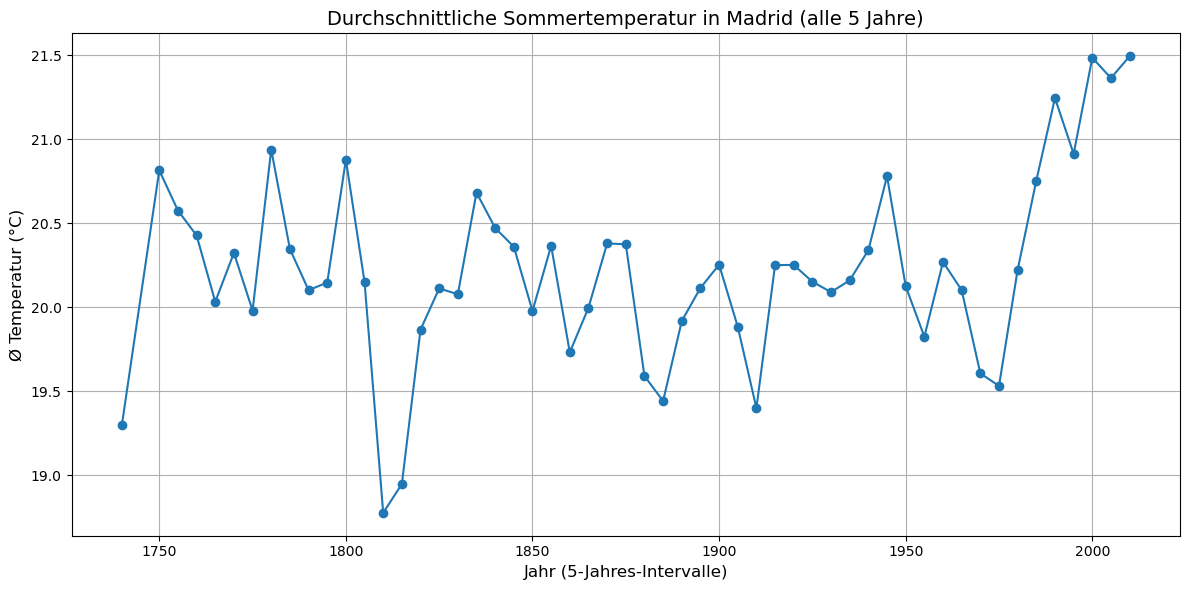

In [13]:
# Datum konvertieren
data['dt'] = pd.to_datetime(data['dt'])

# Daten für Madrid und Sommermonate filtern + .copy() um Warnungen zu vermeiden
madrid_sommer = data[
    (data['City'] == 'Madrid') & 
    (data['dt'].dt.month.isin([6, 7, 8])) &
    (data['AverageTemperature'].notnull())
].copy()

# Jahr und 5-Jahres-Intervall berechnen
madrid_sommer['Jahr'] = madrid_sommer['dt'].dt.year
madrid_sommer['Jahr_5er'] = (madrid_sommer['Jahr'] // 5) * 5

# Durchschnittstemperatur je 5-Jahres-Intervall
madrid_agg = madrid_sommer.groupby('Jahr_5er')['AverageTemperature'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(madrid_agg['Jahr_5er'], madrid_agg['AverageTemperature'], marker='o', linestyle='-')
plt.title('Durchschnittliche Sommertemperatur in Madrid (alle 5 Jahre)', fontsize=14)
plt.xlabel('Jahr (5-Jahres-Intervalle)', fontsize=12)
plt.ylabel('Ø Temperatur (°C)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()



Madrid die Wintermonate (Dezember, Januar, Februar):

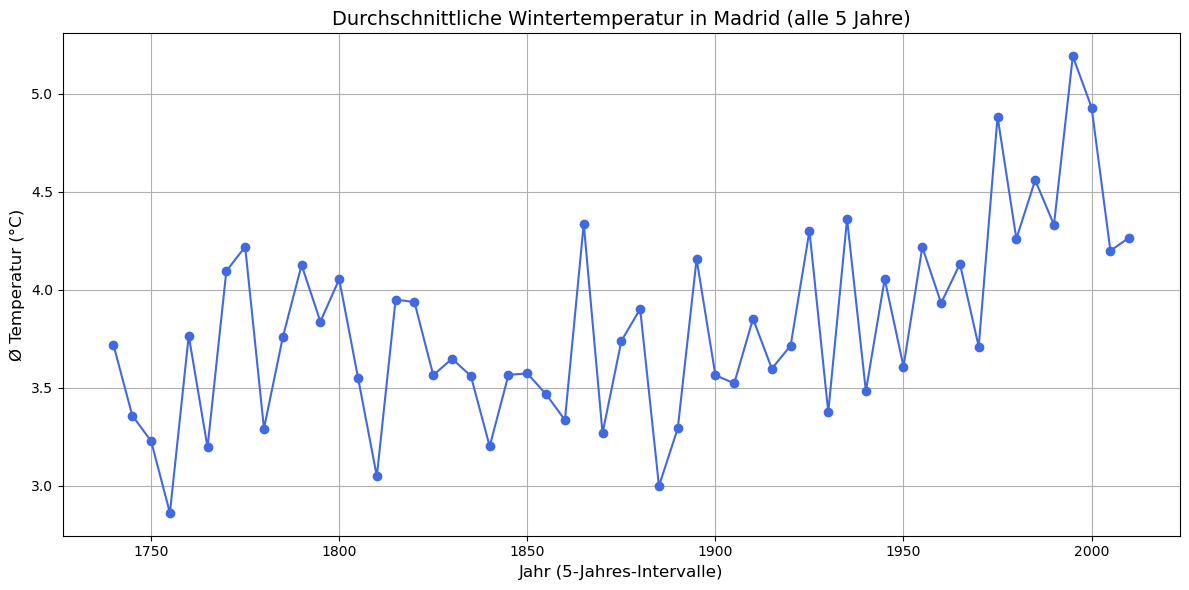

In [14]:
# Daten für Madrid und Wintermonate filtern + .copy() um Warnungen zu vermeiden
madrid_winter = data[
    (data['City'] == 'Madrid') & 
    (data['dt'].dt.month.isin([12, 1, 2])) &
    (data['AverageTemperature'].notnull())
].copy()

# Jahr und 5-Jahres-Intervall berechnen
madrid_winter['Jahr'] = madrid_winter['dt'].dt.year
madrid_winter['Jahr_5er'] = (madrid_winter['Jahr'] // 5) * 5

# Durchschnittstemperatur je 5-Jahres-Intervall
madrid_winter_agg = madrid_winter.groupby('Jahr_5er')['AverageTemperature'].mean().reset_index()

# Plot
plt.figure(figsize=(12, 6))
plt.plot(madrid_winter_agg['Jahr_5er'], madrid_winter_agg['AverageTemperature'], marker='o', linestyle='-', color='royalblue')
plt.title('Durchschnittliche Wintertemperatur in Madrid (alle 5 Jahre)', fontsize=14)
plt.xlabel('Jahr (5-Jahres-Intervalle)', fontsize=12)
plt.ylabel('Ø Temperatur (°C)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()


Was wir machen:
Beide Zeitreihen (Sommer & Winter) in einem Diagramm plotten.

Ihre Differenz oder Korrelation untersuchen – z. B. ob kalte Winter mit kalten Sommern einhergehen.

Dazu plotten wir zusätzlich eine Streudiagramm (Scatterplot): Jeder Punkt ist ein Jahr, X = Wintertemperatur, Y = Sommertemperatur → so erkennst du direkt, ob es eine Korrelation gibt.

🔧 Code für den Vergleich:

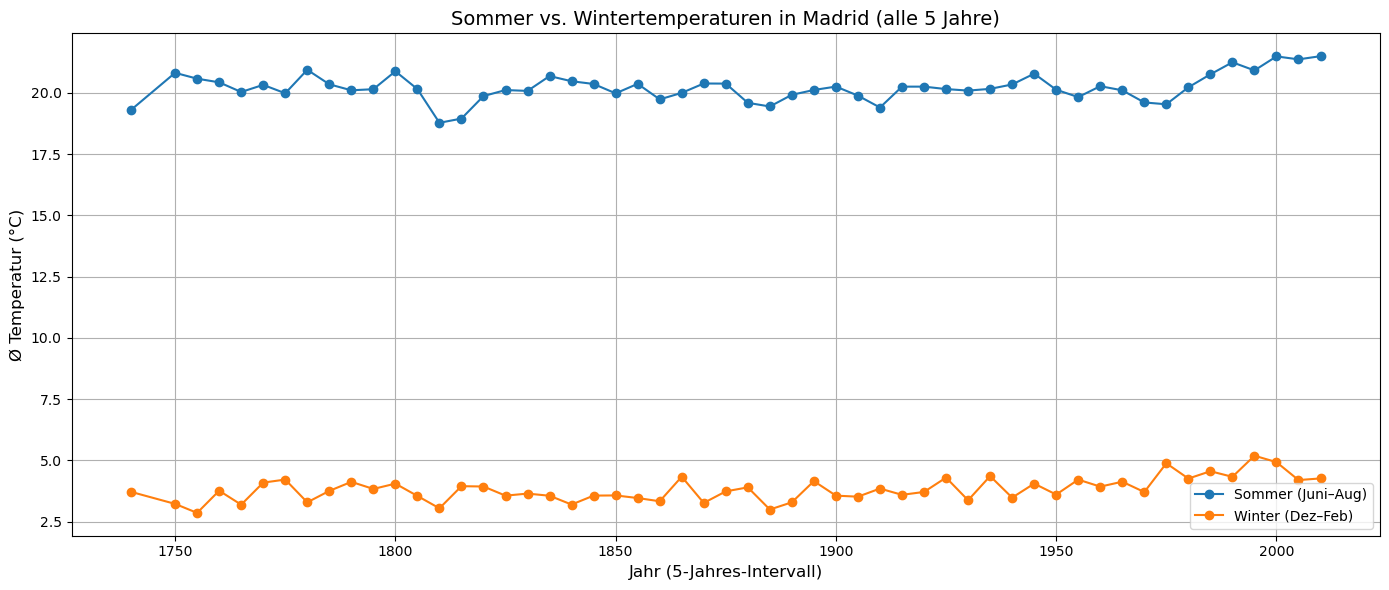

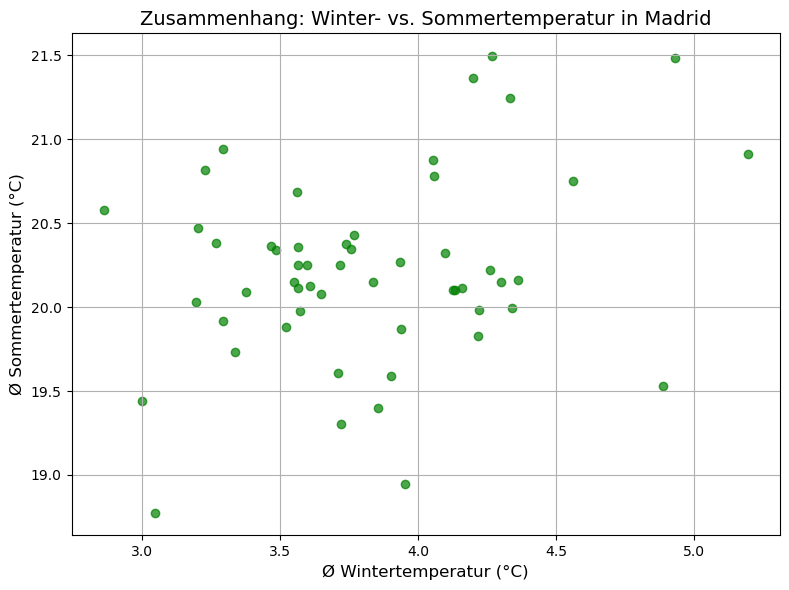

Korrelationskoeffizient: 0.285


In [15]:
# Sicherstellen, dass Datum korrekt ist
data['dt'] = pd.to_datetime(data['dt'])

# --- SOMMERDATEN ---
madrid_sommer = data[
    (data['City'] == 'Madrid') & 
    (data['dt'].dt.month.isin([6, 7, 8])) &
    (data['AverageTemperature'].notnull())
].copy()
madrid_sommer['Jahr'] = madrid_sommer['dt'].dt.year
madrid_sommer['Jahr_5er'] = (madrid_sommer['Jahr'] // 5) * 5
madrid_sommer_agg = madrid_sommer.groupby('Jahr_5er')['AverageTemperature'].mean().reset_index()
madrid_sommer_agg.rename(columns={'AverageTemperature': 'SommerTemp'}, inplace=True)

# --- WINTERDATEN ---
madrid_winter = data[
    (data['City'] == 'Madrid') & 
    (data['dt'].dt.month.isin([12, 1, 2])) &
    (data['AverageTemperature'].notnull())
].copy()
madrid_winter['Jahr'] = madrid_winter['dt'].dt.year
madrid_winter['Jahr_5er'] = (madrid_winter['Jahr'] // 5) * 5
madrid_winter_agg = madrid_winter.groupby('Jahr_5er')['AverageTemperature'].mean().reset_index()
madrid_winter_agg.rename(columns={'AverageTemperature': 'WinterTemp'}, inplace=True)

# --- MERGEN ---
vergleich = pd.merge(madrid_sommer_agg, madrid_winter_agg, on='Jahr_5er')

# --- LINIENDIAGRAMM ---
plt.figure(figsize=(14, 6))
plt.plot(vergleich['Jahr_5er'], vergleich['SommerTemp'], label='Sommer (Juni–Aug)', marker='o')
plt.plot(vergleich['Jahr_5er'], vergleich['WinterTemp'], label='Winter (Dez–Feb)', marker='o')
plt.title('Sommer vs. Wintertemperaturen in Madrid (alle 5 Jahre)', fontsize=14)
plt.xlabel('Jahr (5-Jahres-Intervall)', fontsize=12)
plt.ylabel('Ø Temperatur (°C)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- STREUPLOT: Korrelation Sommer vs. Winter ---
plt.figure(figsize=(8, 6))
plt.scatter(vergleich['WinterTemp'], vergleich['SommerTemp'], c='green', alpha=0.7)
plt.title('Zusammenhang: Winter- vs. Sommertemperatur in Madrid', fontsize=14)
plt.xlabel('Ø Wintertemperatur (°C)', fontsize=12)
plt.ylabel('Ø Sommertemperatur (°C)', fontsize=12)
plt.grid(True)
plt.tight_layout()
plt.show()

# Optional: Korrelationskoeffizient berechnen
korrelation = vergleich[['WinterTemp', 'SommerTemp']].corr().iloc[0, 1]
print(f"Korrelationskoeffizient: {korrelation:.3f}")


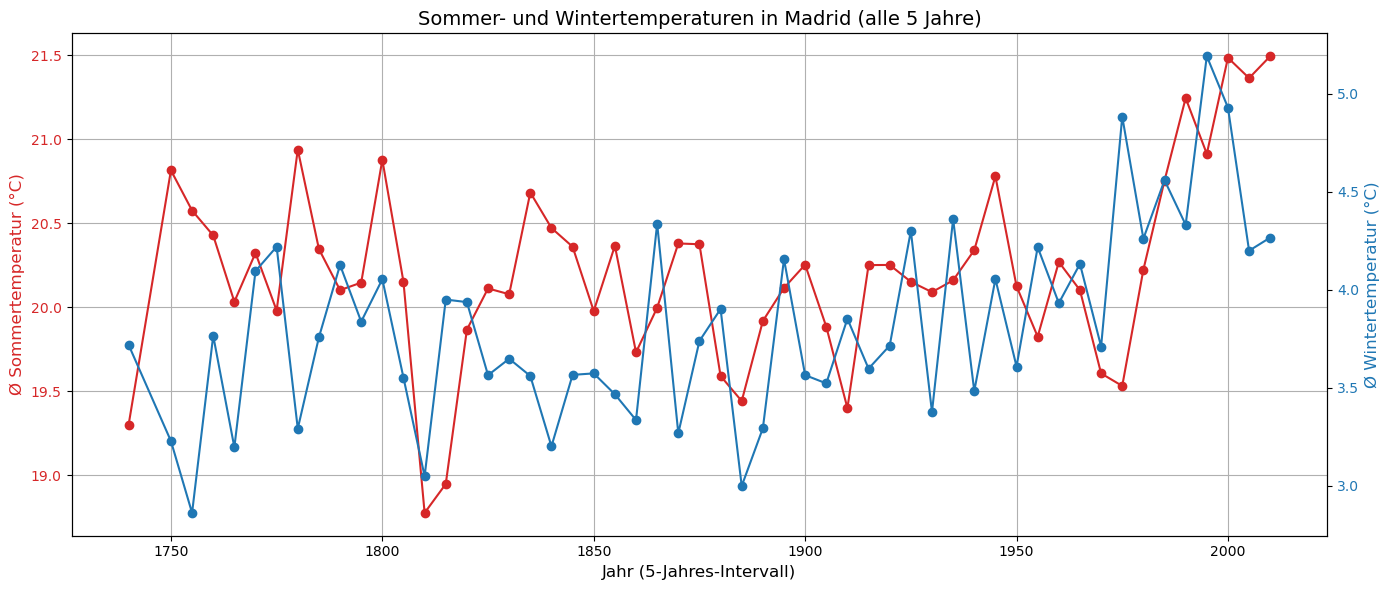

In [16]:
import pandas as pd
import matplotlib.pyplot as plt

# Datum konvertieren
data['dt'] = pd.to_datetime(data['dt'])

# --- SOMMERDATEN ---
madrid_sommer = data[
    (data['City'] == 'Madrid') & 
    (data['dt'].dt.month.isin([6, 7, 8])) &
    (data['AverageTemperature'].notnull())
].copy()

madrid_sommer['Jahr'] = madrid_sommer['dt'].dt.year
madrid_sommer['Jahr_5er'] = (madrid_sommer['Jahr'] // 5) * 5

madrid_sommer_agg = madrid_sommer.groupby('Jahr_5er')['AverageTemperature'].mean().reset_index()
madrid_sommer_agg.rename(columns={'AverageTemperature': 'SommerTemp'}, inplace=True)

# --- WINTERDATEN ---
madrid_winter = data[
    (data['City'] == 'Madrid') & 
    (data['dt'].dt.month.isin([12, 1, 2])) &
    (data['AverageTemperature'].notnull())
].copy()

madrid_winter['Jahr'] = madrid_winter['dt'].dt.year
madrid_winter['Jahr_5er'] = (madrid_winter['Jahr'] // 5) * 5

madrid_winter_agg = madrid_winter.groupby('Jahr_5er')['AverageTemperature'].mean().reset_index()
madrid_winter_agg.rename(columns={'AverageTemperature': 'WinterTemp'}, inplace=True)

# --- MERGEN DER DATEN ---
vergleich = pd.merge(madrid_sommer_agg, madrid_winter_agg, on='Jahr_5er')

# --- TWIN-AXIS-PLOT ---
fig, ax1 = plt.subplots(figsize=(14, 6))

# Sommertemperaturen (linke Achse)
farbe_sommer = 'tab:red'
ax1.set_xlabel('Jahr (5-Jahres-Intervall)', fontsize=12)
ax1.set_ylabel('Ø Sommertemperatur (°C)', color=farbe_sommer, fontsize=12)
ax1.plot(vergleich['Jahr_5er'], vergleich['SommerTemp'], color=farbe_sommer, marker='o', label='Sommer')
ax1.tick_params(axis='y', labelcolor=farbe_sommer)

# Wintertemperaturen (rechte Achse)
ax2 = ax1.twinx()
farbe_winter = 'tab:blue'
ax2.set_ylabel('Ø Wintertemperatur (°C)', color=farbe_winter, fontsize=12)
ax2.plot(vergleich['Jahr_5er'], vergleich['WinterTemp'], color=farbe_winter, marker='o', label='Winter')
ax2.tick_params(axis='y', labelcolor=farbe_winter)

# Titel und Formatierung
plt.title('Sommer- und Wintertemperaturen in Madrid (alle 5 Jahre)', fontsize=14)
ax1.grid(True)
plt.tight_layout()
plt.show()


Die Winter- und Sommertemperaturen desselben 5-Jahres-Zeitraums sollen verglichen werden.

Es geht also nicht um Einzeljahre oder kalte Winter irgendwann – sondern darum:

War z. B. der Zeitraum 1900–1904 im Winter kalt → war der Sommer im selben Intervall auch kalt?

Dann soll die Korrelation dieser gepaarten Durchschnittswerte über alle Zeiträume berechnet werden.

🔧 Lösung:
Wir müssen sicherstellen, dass Winter und Sommer für denselben 5-Jahreszeitraum aggregiert wurden. In deinem bisherigen Scatterplot wurden viele Punkte aus unterschiedlichen Intervallen gemischt – das verzerrt natürlich alles.

Interpretation:
Du bekommst pro Intervall genau einen Punkt.

Wenn der Korrelationskoeffizient hoch ist (z. B. > 0.7), bedeutet das:

Kalte Winter gehen oft mit kühlen Sommern einher (im gleichen Zeitraum).

Ist der Wert nah an 0, gibt es keinen erkennbaren Zusammenhang.


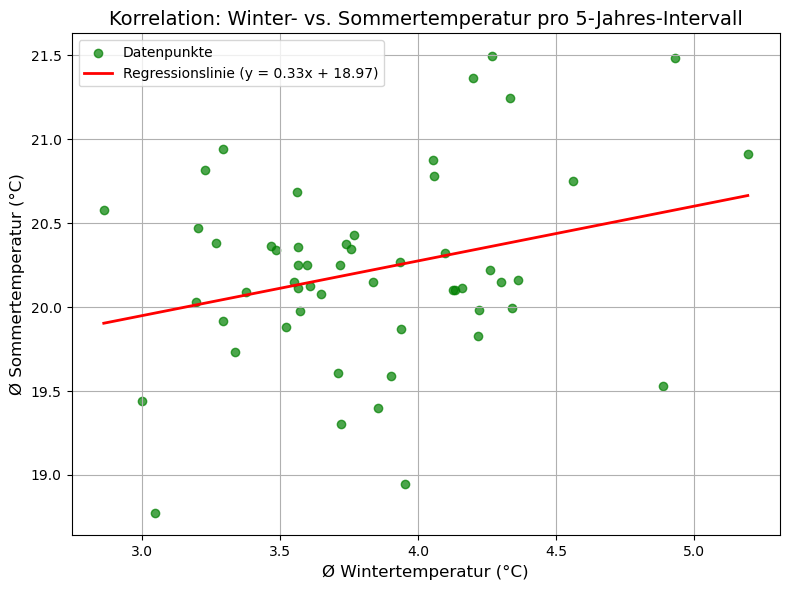

Korrelationskoeffizient: 0.285


In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Datum konvertieren
data['dt'] = pd.to_datetime(data['dt'])

# --- SOMMERDATEN ---
sommer = data[
    (data['City'] == 'Madrid') &
    (data['dt'].dt.month.isin([6, 7, 8])) &
    (data['AverageTemperature'].notnull())
].copy()
sommer['Jahr'] = sommer['dt'].dt.year
sommer['Jahr_5er'] = (sommer['Jahr'] // 5) * 5
sommer_agg = sommer.groupby('Jahr_5er')['AverageTemperature'].mean().reset_index()
sommer_agg.rename(columns={'AverageTemperature': 'SommerTemp'}, inplace=True)

# --- WINTERDATEN ---
winter = data[
    (data['City'] == 'Madrid') &
    (data['dt'].dt.month.isin([12, 1, 2])) &
    (data['AverageTemperature'].notnull())
].copy()
winter['Jahr'] = winter['dt'].dt.year
winter['Jahr_5er'] = (winter['Jahr'] // 5) * 5
winter_agg = winter.groupby('Jahr_5er')['AverageTemperature'].mean().reset_index()
winter_agg.rename(columns={'AverageTemperature': 'WinterTemp'}, inplace=True)

# --- Merge Sommer & Winter pro Intervall ---
vergleich = pd.merge(sommer_agg, winter_agg, on='Jahr_5er')

# --- Scatterplot mit Regressionslinie ---
x = vergleich['WinterTemp']
y = vergleich['SommerTemp']

# Lineare Regression berechnen
m, b = np.polyfit(x, y, 1)
linie_x = np.linspace(x.min(), x.max(), 100)
linie_y = m * linie_x + b

plt.figure(figsize=(8, 6))
plt.scatter(x, y, c='green', alpha=0.7, label='Datenpunkte')
plt.plot(linie_x, linie_y, color='red', linewidth=2, label=f'Regressionslinie (y = {m:.2f}x + {b:.2f})')

plt.title('Korrelation: Winter- vs. Sommertemperatur pro 5-Jahres-Intervall', fontsize=14)
plt.xlabel('Ø Wintertemperatur (°C)', fontsize=12)
plt.ylabel('Ø Sommertemperatur (°C)', fontsize=12)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# --- Korrelationskoeffizient ---
korrelation = vergleich[['WinterTemp', 'SommerTemp']].corr().iloc[0, 1]
print(f"Korrelationskoeffizient: {korrelation:.3f}")


5-Jahres-Intervalle auf der X-Achse sehen, nicht die Temperaturwerte. Das heißt:

X-Achse: Zeit (Jahr_5er),

Y-Achsen: Sommertemperatur & Wintertemperatur,

Ziel: Sehen, ob beide Temperaturen zeitlich gemeinsam schwanken (nicht direkt Korrelation zwischen Temperaturen, sondern ihr Verlauf über die Zeit).

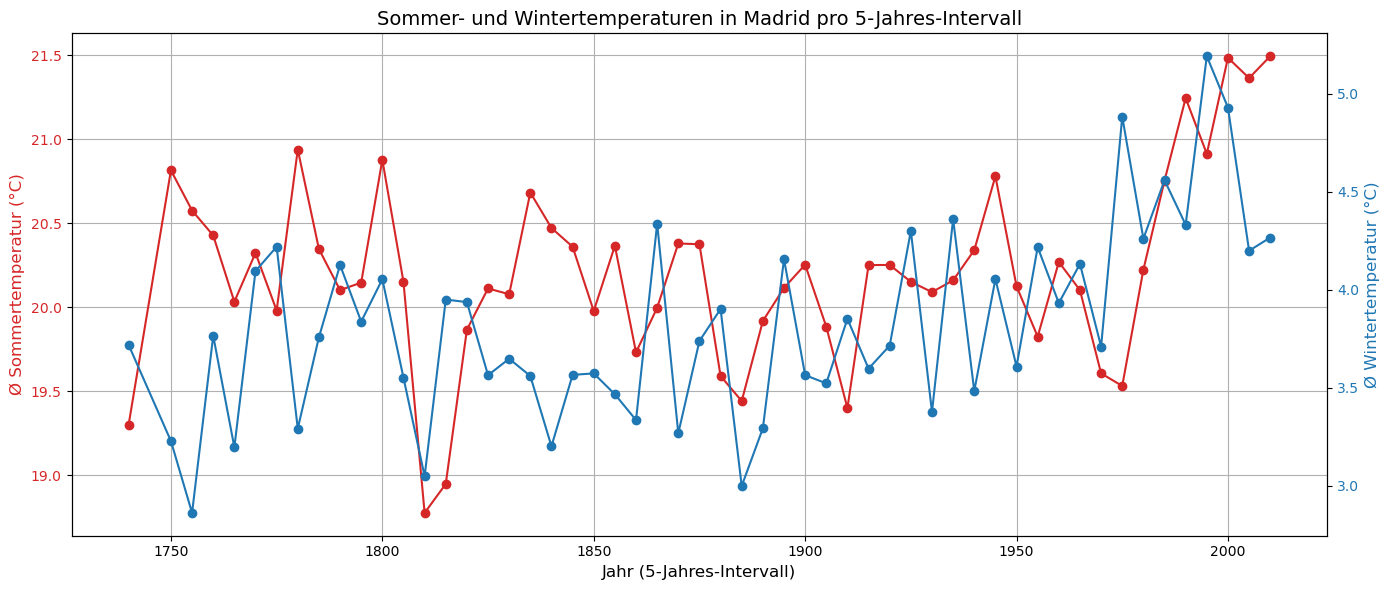

In [18]:
# Plot mit zwei Y-Achsen: Sommer (links), Winter (rechts), X = Zeit (Jahr_5er)
fig, ax1 = plt.subplots(figsize=(14, 6))

# Sommertemperaturen (linke Y-Achse)
farbe_sommer = 'tab:red'
ax1.set_xlabel('Jahr (5-Jahres-Intervall)', fontsize=12)
ax1.set_ylabel('Ø Sommertemperatur (°C)', color=farbe_sommer, fontsize=12)
ax1.plot(vergleich['Jahr_5er'], vergleich['SommerTemp'], color=farbe_sommer, marker='o', label='Sommer')
ax1.tick_params(axis='y', labelcolor=farbe_sommer)

# Wintertemperaturen (rechte Y-Achse)
ax2 = ax1.twinx()
farbe_winter = 'tab:blue'
ax2.set_ylabel('Ø Wintertemperatur (°C)', color=farbe_winter, fontsize=12)
ax2.plot(vergleich['Jahr_5er'], vergleich['WinterTemp'], color=farbe_winter, marker='o', label='Winter')
ax2.tick_params(axis='y', labelcolor=farbe_winter)

# Titel, Grid, Layout
plt.title('Sommer- und Wintertemperaturen in Madrid pro 5-Jahres-Intervall', fontsize=14)
ax1.grid(True)
plt.tight_layout()
plt.show()


X-Achse: Zeit (5-Jahres-Intervalle)

Y-Achse links: Sommertemperatur (mit Regressionslinie)

Y-Achse rechts: Wintertemperatur (mit Regressionslinie)

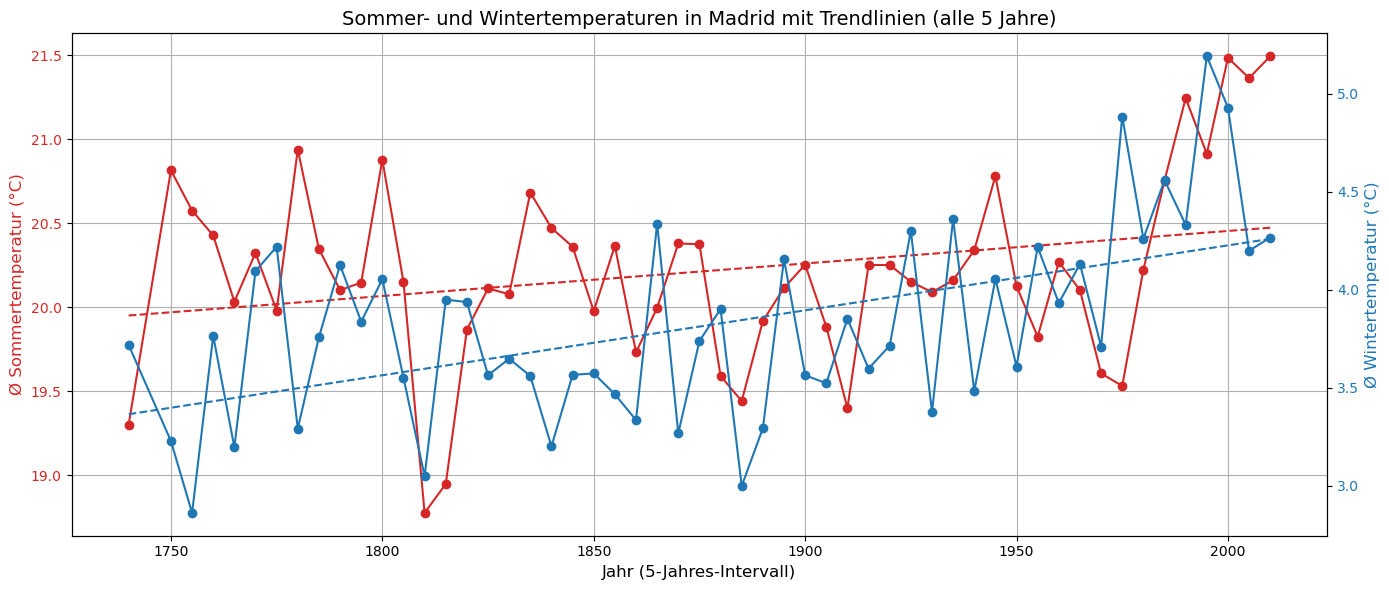

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Datum konvertieren
data['dt'] = pd.to_datetime(data['dt'])

# --- SOMMERDATEN ---
sommer = data[
    (data['City'] == 'Madrid') &
    (data['dt'].dt.month.isin([6, 7, 8])) &
    (data['AverageTemperature'].notnull())
].copy()
sommer['Jahr'] = sommer['dt'].dt.year
sommer['Jahr_5er'] = (sommer['Jahr'] // 5) * 5
sommer_agg = sommer.groupby('Jahr_5er')['AverageTemperature'].mean().reset_index()
sommer_agg.rename(columns={'AverageTemperature': 'SommerTemp'}, inplace=True)

# --- WINTERDATEN ---
winter = data[
    (data['City'] == 'Madrid') &
    (data['dt'].dt.month.isin([12, 1, 2])) &
    (data['AverageTemperature'].notnull())
].copy()
winter['Jahr'] = winter['dt'].dt.year
winter['Jahr_5er'] = (winter['Jahr'] // 5) * 5
winter_agg = winter.groupby('Jahr_5er')['AverageTemperature'].mean().reset_index()
winter_agg.rename(columns={'AverageTemperature': 'WinterTemp'}, inplace=True)

# --- Merge Sommer & Winter ---
vergleich = pd.merge(sommer_agg, winter_agg, on='Jahr_5er')

# --- Regressionslinien berechnen ---
x = vergleich['Jahr_5er']

# Sommer
sommer_y = vergleich['SommerTemp']
m_sommer, b_sommer = np.polyfit(x, sommer_y, 1)
sommer_reg = m_sommer * x + b_sommer

# Winter
winter_y = vergleich['WinterTemp']
m_winter, b_winter = np.polyfit(x, winter_y, 1)
winter_reg = m_winter * x + b_winter

# --- Plot mit zwei Y-Achsen ---
fig, ax1 = plt.subplots(figsize=(14, 6))

# Sommer (linke Achse)
farbe_sommer = 'tab:red'
ax1.set_xlabel('Jahr (5-Jahres-Intervall)', fontsize=12)
ax1.set_ylabel('Ø Sommertemperatur (°C)', color=farbe_sommer, fontsize=12)
ax1.plot(x, sommer_y, color=farbe_sommer, marker='o', label='Sommer')
ax1.plot(x, sommer_reg, color=farbe_sommer, linestyle='--', label='Sommer-Trend')
ax1.tick_params(axis='y', labelcolor=farbe_sommer)

# Winter (rechte Achse)
ax2 = ax1.twinx()
farbe_winter = 'tab:blue'
ax2.set_ylabel('Ø Wintertemperatur (°C)', color=farbe_winter, fontsize=12)
ax2.plot(x, winter_y, color=farbe_winter, marker='o', label='Winter')
ax2.plot(x, winter_reg, color=farbe_winter, linestyle='--', label='Winter-Trend')
ax2.tick_params(axis='y', labelcolor=farbe_winter)

# Titel, Layout
plt.title('Sommer- und Wintertemperaturen in Madrid mit Trendlinien (alle 5 Jahre)', fontsize=14)
ax1.grid(True)
plt.tight_layout()
plt.show()
